# **Метод k-ближайших соседей**

## Содержание
1. Описание датасета. Загрузка данных. Масштабирование данных
2. Разделение выборки на тестовую и обучающую.
3. Результаты с произвольно выбранным К.
4. Подбор гиперпараметра К с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации.
5. Сравнение метрики качества исходной и оптимальной моделей.

## 1. Описание датасета

Возьмем уже известный датасет из [1ой лабораторной](https://github.com/KZLZG/TML/blob/main/Lab1/lab-1.ipynb), мы уже его проанализировали.

#### Импорт библиотек

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

#### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV, столбцы разделены табуляцией

In [3]:
data = pd.read_csv('../Lab1/diabet.txt', sep="	")

In [4]:
# Напомним себе содержание датасета
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Для целей обучения и удобства визуализации я в начале возьму в качестве известных признаков BMI & BP. Результирующим параметром у нас является параметр Y

In [7]:
data_for_lab = data[['BMI', 'BP', 'Y']]

,BMI,BP,Y
0,32.1,101.00,151
1,21.6,87.00,75
2,30.5,93.00,141
3,25.3,84.00,206
4,23.0,101.00,135
...,...,...,...
437,28.2,112.00,178
438,24.9,75.00,104
439,24.9,99.67,132
440,30.0,95.00,220


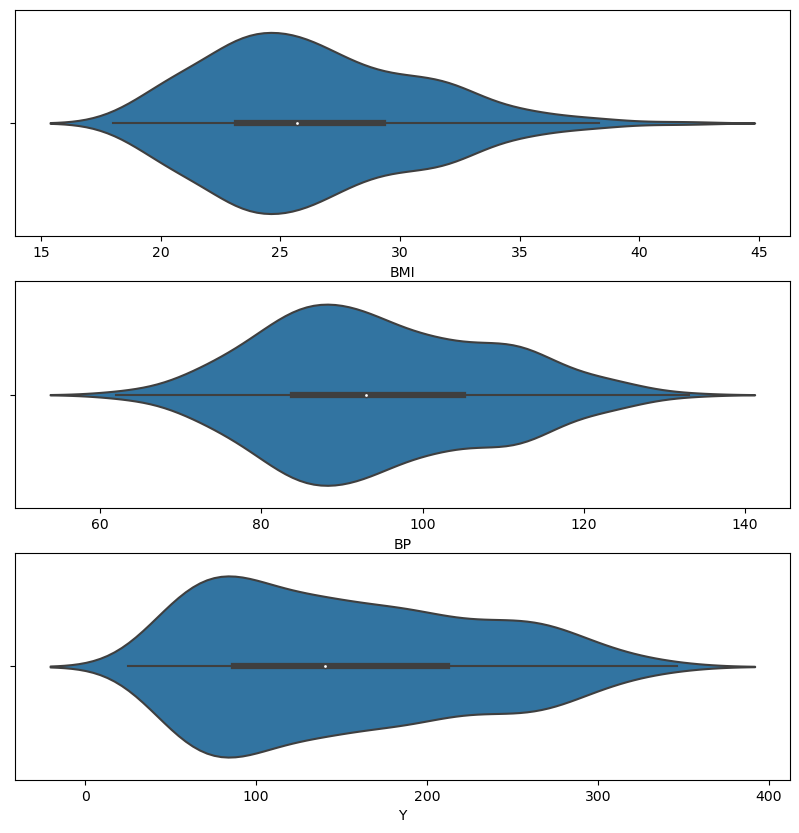

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data_for_lab['BMI'])
sns.violinplot(ax=ax[1], x=data_for_lab['BP'])
sns.violinplot(ax=ax[2], x=data_for_lab['Y'])
plt.show()

Можем заметить что признаки отличаются друг от друга по масштабу, поэтому необходимо привести их к единому

## 2. Разделение выборки на тестовую и обучающую.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
X_scale = ss.fit_transform(X)